<a href="https://colab.research.google.com/github/marwankashef/General-Modelling/blob/master/Predictive_Modelling_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries/Modules

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as cbrn
import matplotlib.pyplot as plt

# Data Metric and Processing Metrics

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import classification_report, accuracy_score, confusion_matrix
from patsy import dmatrices

# UX

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import Modules for Modelling

# Linear Regression
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC

# XGBoost
import xgboost as xgb

# Stylistic

cbrn.set(style = 'ticks', palette = 'Set2')
%matplotlib inline

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import tensorflow as tf
tf.__version__

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

'1.13.1'

In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [ ]:
import os
os.getcwd()

'/Users/marwankashef/Dropbox/Marwan/MMAI/MMAI 869/Individual Assignments'

# Import Dataset

In [ ]:
oj_raw = pd.read_csv('OJ.csv')

In [ ]:
oj_raw

Unnamed: 0 Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  \
0              1       CH             237        1     1.75     1.99    0.00   
1              2       CH             239        1     1.75     1.99    0.00   
2              3       CH             245        1     1.86     2.09    0.17   
3              4       MM             227        1     1.69     1.69    0.00   
4              5       CH             228        7     1.69     1.69    0.00   
...          ...      ...             ...      ...      ...      ...     ...   
1065        1066       CH             252        7     1.86     2.09    0.10   
1066        1067       CH             256        7     1.86     2.18    0.00   
1067        1068       MM             257        7     1.86     2.18    0.00   
1068        1069       CH             261        7     1.86     2.13    0.00   
1069        1070       CH             270        1     1.86     2.18    0.00   

      DiscMM  SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  \
0       0.00          0          0  0.500000         1.99         1.75   
1       0.30          0          1  0.600000         1.69         1.75   
2       0.00          0          0  0.680000         2.09         1.69   
3       0.00          0          0  0.400000         1.69         1.69   
4       0.00          0          0  0.956535         1.69         1.69   
...      ...        ...        ...       ...          ...          ...   
1065    0.00          0          0  0.587822         2.09         1.76   
1066    0.00          0          0  0.670258         2.18         1.86   
1067    0.00          0          0  0.736206         2.18         1.86   
1068    0.24          0          0  0.588965         1.89         1.86   
1069    0.00          0          0  0.671172         2.18         1.86   

      PriceDiff Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0          0.24     No   0.000000   0.000000           0.24      1  
1         -0.06     No   0.150754   0.000000           0.24      1  
2          0.40     No   0.000000   0.091398           0.23      1  
3          0.00     No   0.000000   0.000000           0.00      1  
4          0.00    Yes   0.000000   0.000000           0.00      0  
...         ...    ...        ...        ...            ...    ...  
1065       0.33    Yes   0.000000   0.053763           0.23      0  
1066       0.32    Yes   0.000000   0.000000           0.32      0  
1067       0.32    Yes   0.000000   0.000000           0.32      0  
1068       0.03    Yes   0.112676   0.000000           0.27      0  
1069       0.32     No   0.000000   0.000000           0.32      1  

[1070 rows x 19 columns]

# Inspect Data Set

In [ ]:
# To avoid scrolling through the above, the entire array will be printed to better gauge the available columns

oj_raw.columns.values

array(['Unnamed: 0', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE'], dtype=object)

In [ ]:
# Remove the Unnamed Column

oj_nopulp = oj_raw.drop(columns = ['Unnamed: 0'])
oj_nopulp.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

In [ ]:
oj_nopulp.columns.values

array(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM',
       'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE'], dtype=object)

In [ ]:
oj_nopulp.describe()

WeekofPurchase      StoreID      PriceCH      PriceMM       DiscCH  \
count     1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean       254.381308     3.959813     1.867421     2.085411     0.051860   
std         15.558286     2.308984     0.101970     0.134386     0.117474   
min        227.000000     1.000000     1.690000     1.690000     0.000000   
25%        240.000000     2.000000     1.790000     1.990000     0.000000   
50%        257.000000     3.000000     1.860000     2.090000     0.000000   
75%        268.000000     7.000000     1.990000     2.180000     0.000000   
max        278.000000     7.000000     2.090000     2.290000     0.500000   

            DiscMM    SpecialCH    SpecialMM      LoyalCH  SalePriceMM  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.123364     0.147664     0.161682     0.565782     1.962047   
std       0.213834     0.354932     0.368331     0.307843     0.252697   
min       0.000000     0.000000     0.000000     0.000011     1.190000   
25%       0.000000     0.000000     0.000000     0.325257     1.690000   
50%       0.000000     0.000000     0.000000     0.600000     2.090000   
75%       0.230000     0.000000     0.000000     0.850873     2.130000   
max       0.800000     1.000000     1.000000     0.999947     2.290000   

       SalePriceCH    PriceDiff    PctDiscMM    PctDiscCH  ListPriceDiff  \
count  1070.000000  1070.000000  1070.000000  1070.000000    1070.000000   
mean      1.815561     0.146486     0.059298     0.027314       0.217991   
std       0.143384     0.271563     0.101760     0.062232       0.107535   
min       1.390000    -0.670000     0.000000     0.000000       0.000000   
25%       1.750000     0.000000     0.000000     0.000000       0.140000   
50%       1.860000     0.230000     0.000000     0.000000       0.240000   
75%       1.890000     0.320000     0.112676     0.000000       0.300000   
max       2.090000     0.640000     0.402010     0.252688       0.440000   

             STORE  
count  1070.000000  
mean      1.630841  
std       1.430387  
min       0.000000  
25%       0.000000  
50%       2.000000  
75%       3.000000  
max       4.000000

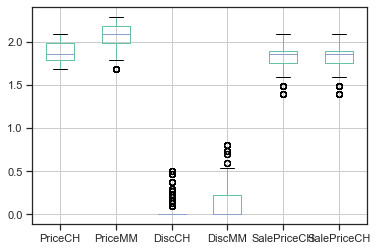

In [ ]:
# Visualize Data to Assess Any Outliers

oj_nopulp.boxplot(column=['PriceCH','PriceMM','DiscCH','DiscMM','SalePriceCH','SalePriceCH'])

In [ ]:
# Double check that code above works

oj_nopulp.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

# Pandas Profiling Report

In [ ]:
import pandas as pd
import pandas_profiling

pandas_profiling.ProfileReport(oj_nopulp)

In [ ]:
oj_nopulp.to_csv (r'oj_nopulp.csv', index = None, header=True)

In [ ]:
# For Purchase column, in order to properly include the variable in the models,
# convert MM (Minute Maid) to 1 and CH (Citrus Hill) to 0 by creating new column  

oj_nopulp['MM'] = oj_nopulp['Purchase'].apply(lambda x: 1 if x == 'MM' else 0)

In [ ]:
# Double check that code above works

oj_nopulp.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  MM  
0   0.000000   0.000000           0.24      1   0  
1   0.150754   0.000000           0.24      1   0  
2   0.000000   0.091398           0.23      1   0  
3   0.000000   0.000000           0.00      1   1  
4   0.000000   0.000000           0.00      0   0

In [ ]:
# Using dmatrices function from Patsy, two matrices will be created in order to cleanly separate the data

# In the following function, C's ahead of columns denote a categorical variableime

y, X = dmatrices('MM ~ WeekofPurchase + C(StoreID) + PriceCH + PriceMM + DiscCH + DiscMM + SpecialCH + SpecialMM + LoyalCH + SalePriceMM + SalePriceCH + PriceDiff +  PctDiscMM + PctDiscCH + ListPriceDiff', oj_nopulp, return_type = 'dataframe')

In [ ]:
# Check shape and contents of matrices produced above - y

print(y.shape)

print('')

print(y.head())

(1070, 1)

    MM
0  0.0
1  0.0
2  0.0
3  1.0
4  0.0


In [ ]:
# Check shape and contents of matrices produced above - X

print(X.shape)

print('')

print(X.head())

# There are four columns that will be created due to the fact that Store ID was processed as a categorical variable.
# These are dummy variables that are created as factors - if you have 5 unique values in a column, you'll have 4
# Levels or factors created (N - 1)

(1070, 19)

   Intercept  C(StoreID)[T.2]  C(StoreID)[T.3]  C(StoreID)[T.4]  \
0        1.0              0.0              0.0              0.0   
1        1.0              0.0              0.0              0.0   
2        1.0              0.0              0.0              0.0   
3        1.0              0.0              0.0              0.0   
4        1.0              0.0              0.0              0.0   

   C(StoreID)[T.7]  WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  \
0              0.0           237.0     1.75     1.99    0.00     0.0   
1              0.0           239.0     1.75     1.99    0.00     0.3   
2              0.0           245.0     1.86     2.09    0.17     0.0   
3              0.0           227.0     1.69     1.69    0.00     0.0   
4              1.0           228.0     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0        0.0        0.0  0.500000         1.99         1.75       0.24   
1   

# Split the Data

In [ ]:
# Training and Test Ratio to be used is 80-20

# X = feature matrix
# y = target vector

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("X Training:")
print(X_training.shape)
print("")

print("X Test:")
print(X_test.shape)
print("")

print("y training:")
print(y_training.shape)
print("")

print("y test:")
print(y_test.shape)
print("")

X Training:
(856, 19)

X Test:
(214, 19)

y training:
(856, 1)

y test:
(214, 1)



In [ ]:
# Split the Training Set with 75-25 ratio - 75% for training, and 25% for validation
# The test_size of 0.25 below denotes that fact that of 100% of the training data
# 25% is being used

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

In [ ]:
print("X Train: ")
print(X_train.shape)
print("")


print("X Val:")
print(X_val.shape)
print("")

print("y train:")
print(y_train.shape)
print("")

print("y val:")
print(y_val.shape)
print("")

X Train: 
(642, 19)

X Val:
(214, 19)

y train:
(642, 1)

y val:
(214, 1)



# Scaling the Data

Scaling Method 1 - Standard Scaler

In [ ]:
# this will be used for any models that require normalization

scaler = StandardScaler()

# use fit_transform to fit the scaled data and transform it for training

X_train_ss = scaler.fit_transform(X_training)

X_val_ss = scaler.transform(X_val)

X_test_ss = scaler.transform(X_test)

Scaling Method 2 - MinMaxScaler

In [ ]:
# Scaling Method 2 - MinMaxScaler()
# alternative method that could be used in certain models to improve accuracy

scaler = MinMaxScaler()

# use fit_transform to fit the scaled data and transform it for training

X_train_mms = scaler.fit_transform(X_training)

X_val_mms = scaler.transform(X_val)

X_test_mms = scaler.transform(X_test)

# Feature Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

clf_test = DecisionTreeClassifier(random_state=0)     #sets the classifier to a basic decision tree
rfecv = RFECV(estimator=clf_test, step=1, cv=StratifiedKFold(20), scoring='accuracy')
%time rfecv.fit(X_train, y_train)

CPU times: user 932 ms, sys: 14.3 ms, total: 946 ms
Wall time: 980 ms


RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=0,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)
rfecv.get_support(indices=True)
X_train.columns[rfecv.get_support()]

Optimal number of features : 9


array([ 1,  3,  5,  7, 11, 12, 13, 15, 18])

Index(['C(StoreID)[T.2]', 'C(StoreID)[T.4]', 'WeekofPurchase', 'PriceMM',
       'SpecialMM', 'LoyalCH', 'SalePriceMM', 'PriceDiff', 'ListPriceDiff'],
      dtype='object')

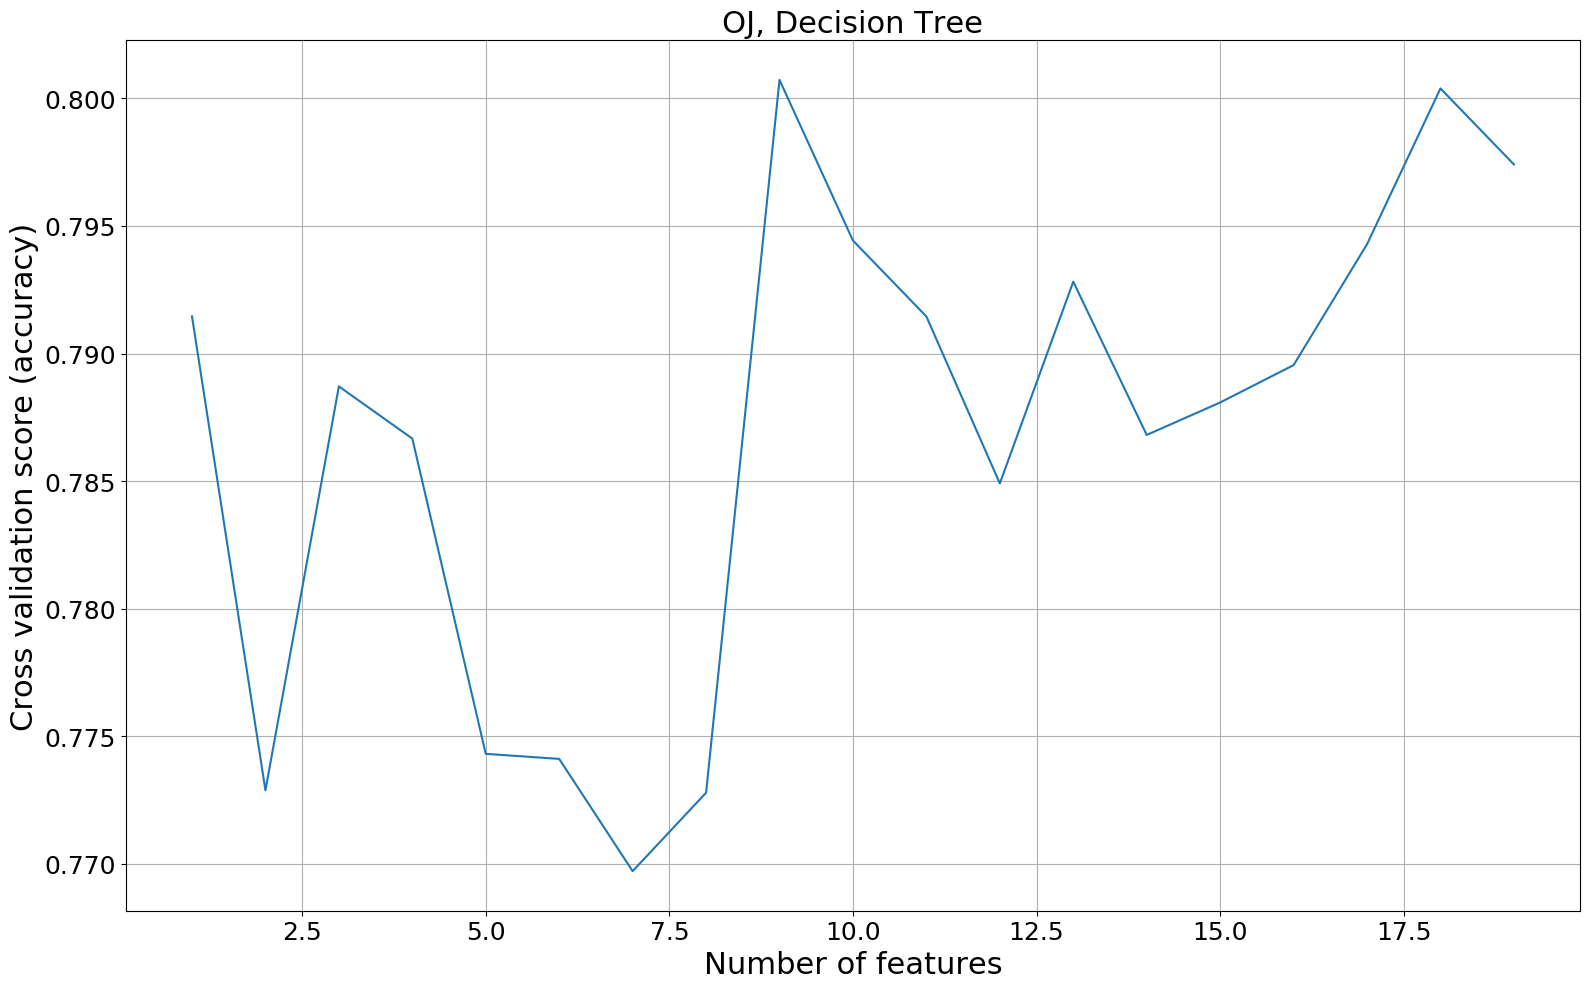

In [ ]:
#Plot number of features VS. cross-validation scores
plt.figure(figsize=(16, 10));
plt.grid(True);
plt.title('OJ, Decision Tree', fontsize=22);
plt.xlabel("Number of features", fontsize=22);
plt.ylabel("Cross validation score (accuracy)", fontsize=22);
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();

# Dropping Correlated Fields

In [ ]:
X_training.drop(['SpecialCH','SpecialMM','PctDiscMM','PctDiscCH','DiscCH','DiscMM'],axis=1)

Intercept  C(StoreID)[T.2]  C(StoreID)[T.3]  C(StoreID)[T.4]  \
351         1.0              0.0              0.0              0.0   
530         1.0              1.0              0.0              0.0   
896         1.0              0.0              0.0              0.0   
947         1.0              0.0              1.0              0.0   
936         1.0              1.0              0.0              0.0   
...         ...              ...              ...              ...   
330         1.0              0.0              0.0              0.0   
466         1.0              0.0              0.0              0.0   
121         1.0              0.0              0.0              0.0   
1044        1.0              0.0              0.0              0.0   
860         1.0              0.0              0.0              0.0   

      C(StoreID)[T.7]  WeekofPurchase  PriceCH  PriceMM   LoyalCH  \
351               1.0           278.0     2.06     2.13  0.982408   
530               0.0           236.0     1.75     1.99  0.680000   
896               1.0           259.0     1.86     2.18  0.868928   
947               0.0           260.0     1.99     2.09  0.011649   
936               0.0           231.0     1.69     1.69  0.135607   
...               ...             ...      ...      ...       ...   
330               0.0           262.0     1.76     1.99  0.500000   
466               1.0           269.0     1.86     2.13  0.829606   
121               0.0           261.0     1.76     1.99  0.967444   
1044              0.0           241.0     1.86     1.99  0.777178   
860               1.0           274.0     1.86     2.13  0.978010   

      SalePriceMM  SalePriceCH  PriceDiff  ListPriceDiff  
351          2.13         2.06       0.07           0.07  
530          1.99         1.75       0.24           0.24  
896          2.18         1.86       0.32           0.32  
947          2.09         1.99       0.10           0.10  
936          1.69         1.39       0.30           0.00  
...           ...          ...        ...            ...  
330          1.59         1.76      -0.17           0.23  
466          2.13         1.59       0.54           0.27  
121          1.99         1.76       0.23           0.23  
1044         1.69         1.86      -0.17           0.13  
860          1.59         1.39       0.20           0.27  

[856 rows x 13 columns]

In [ ]:
X_test.drop(['SpecialCH','SpecialMM','PctDiscMM','PctDiscCH','DiscCH','DiscMM'],axis=1)

Intercept  C(StoreID)[T.2]  C(StoreID)[T.3]  C(StoreID)[T.4]  \
644        1.0              0.0              1.0              0.0   
629        1.0              1.0              0.0              0.0   
70         1.0              0.0              0.0              1.0   
962        1.0              0.0              0.0              0.0   
787        1.0              0.0              1.0              0.0   
..         ...              ...              ...              ...   
486        1.0              1.0              0.0              0.0   
833        1.0              0.0              1.0              0.0   
312        1.0              1.0              0.0              0.0   
458        1.0              1.0              0.0              0.0   
652        1.0              1.0              0.0              0.0   

     C(StoreID)[T.7]  WeekofPurchase  PriceCH  PriceMM   LoyalCH  SalePriceMM  \
644              0.0           239.0     1.79     2.23  0.670149         2.23   
629              0.0           260.0     1.86     2.18  0.456000         1.48   
70               0.0           274.0     1.99     2.09  0.718311         1.69   
962              0.0           227.0     1.69     1.69  0.600000         1.69   
787              0.0           273.0     1.99     2.09  0.053687         1.69   
..               ...             ...      ...      ...       ...          ...   
486              0.0           237.0     1.75     1.99  0.680000         1.99   
833              0.0           241.0     1.79     2.23  0.204800         2.23   
312              0.0           275.0     1.96     2.18  0.661682         1.38   
458              0.0           275.0     1.96     2.18  0.562590         1.38   
652              0.0           260.0     1.86     2.18  0.944660         1.48   

     SalePriceCH  PriceDiff  ListPriceDiff  
644         1.79       0.44           0.44  
629         1.86      -0.38           0.32  
70          1.99      -0.30           0.10  
962         1.69       0.00           0.00  
787         1.99      -0.30           0.10  
..           ...        ...            ...  
486         1.75       0.24           0.24  
833         1.79       0.44           0.44  
312         1.96      -0.58           0.22  
458         1.96      -0.58           0.22  
652         1.86      -0.38           0.32  

[214 rows x 13 columns]

# Running Models

In [ ]:
# Writing the evaluation metrics as a function. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Linear Regression

Hyperparameter Tuning

In [ ]:
lr = LogisticRegression(fit_intercept = False, 
                        penalty='l2', 
                        #dual=True,
                        #tol=0.0001,
                        C=1, 
                        #intercept_scaling=1.0,
                        #class_weight=None, 
                        random_state=42)

lr = lr.fit(X_training, y_training.values.ravel())
lr.coef_

lr_test_pred = lr.predict(X_test_mms)
lr_training_pred = lr.predict(X_training)

array([[ 1.01050522,  0.30595757,  0.13742806, -0.57097385, -0.45910572,
        -0.00713013,  0.94640404, -0.08445954, -0.3597016 ,  0.14686591,
         0.01968133,  0.22642285, -5.15540999, -0.23132545,  1.30610564,
        -1.53743109,  0.01893595, -0.19123372, -1.03086359]])

In [ ]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=1,
                    n_jobs=-1)

grid_result = grid.fit(X_training, y_training)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:    5.1s


Best Score:  0.8411214953271028
Best Params:  {'C': 1000, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    8.3s finished


In [ ]:
lr_tuned = LogisticRegression(fit_intercept = False,
                              penalty='l1', 
                              C=10,
                              solver = 'liblinear',
                              class_weight= {1: 0.5, 0: 0.5}, 
                              random_state = 42)
                              
lr_tuned = lr_tuned.fit(X_training, y_training.values.ravel())
lr_tuned.coef_

lr_test_pred = lr_tuned.predict(X_test)
lr_training_pred = lr_tuned.predict(X_training)

array([[ 2.66551737,  0.28734351,  0.        , -0.62760864, -0.49782378,
        -0.0131009 ,  0.75332973,  0.        ,  0.        ,  0.        ,
         0.        ,  0.18114893, -6.06355344,  0.30941848,  1.15908282,
        -2.51513584,  0.        ,  0.        , -1.56034166]])

Linear Regression Confusion Matrix - Training

In [ ]:
confusion_matrix(y_training, y_training)

array([[523,   0],
       [  0, 333]])

In [ ]:
print(classification_report(y_training, lr_training_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       523
         1.0       0.81      0.77      0.79       333

    accuracy                           0.84       856
   macro avg       0.84      0.83      0.83       856
weighted avg       0.84      0.84      0.84       856



Linear Regression Confusion Matrix - Test

In [ ]:
confusion_matrix(y_test, lr_test_pred)

array([[116,  14],
       [ 25,  59]])

In [ ]:
print(classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       130
         1.0       0.81      0.70      0.75        84

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214



ROC Curve - Linear Regression

In [ ]:
# Plot the ROC curve for Linear Regression


from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(lr, X_test, y_test, name, ax, show_thresholds=True):
    lr_test_pred = lr.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, lr_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

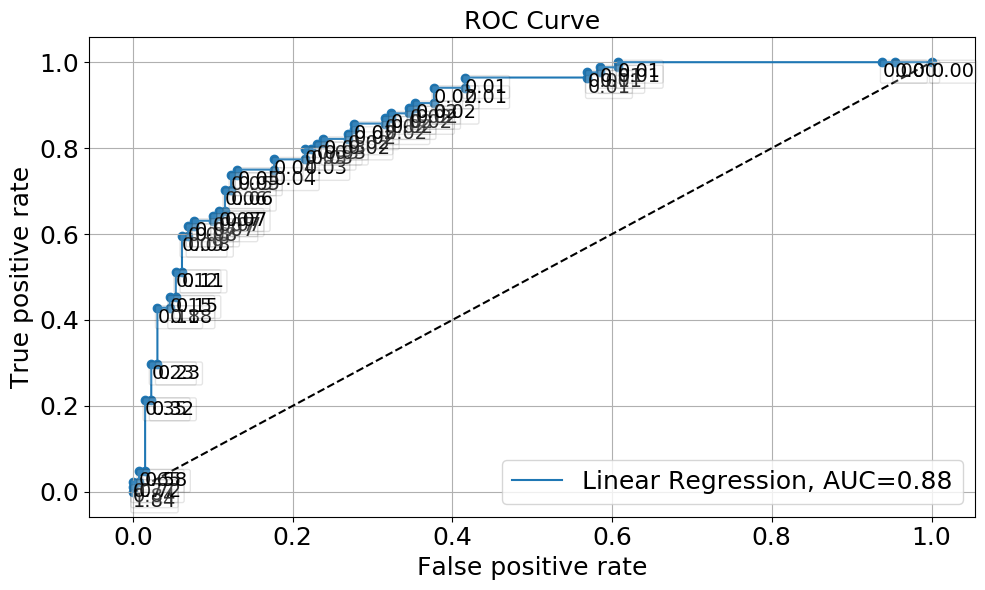

In [ ]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(lr, X_test_mms, y_test, "Linear Regression", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# Random Forest

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
#rf_random.fit(X_training, y_training)

Build Model

In [ ]:
rf_clf = rf_random

In [ ]:
print(rf_clf)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [ ]:
# Training the random forest Classifier 
rf_clf.fit(X_training, y_training.values.ravel())

rf_training_pred = rf_clf.predict(X_training)

rf_train_pred = rf_clf.predict(X_train)

rf_test_pred = rf_clf.predict(X_test)

rf_val_pred = rf_clf.predict(X_val)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [ ]:
print(rf_clf.best_params_)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


Random Forest Confusion Matrix - Training

In [ ]:
confusion_matrix(y_training, rf_training_pred)

array([[480,  43],
       [ 58, 275]])

In [ ]:
print(classification_report(y_training, rf_training_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       523
         1.0       0.86      0.83      0.84       333

    accuracy                           0.88       856
   macro avg       0.88      0.87      0.87       856
weighted avg       0.88      0.88      0.88       856



Random Forest Confusion Matrix - Testing

In [ ]:
confusion_matrix(y_test, rf_test_pred)

array([[111,  19],
       [ 23,  61]])

In [ ]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       130
         1.0       0.76      0.73      0.74        84

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [ ]:
#plot the ROC curve for the Random Forest Classifier

from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    rf_test_pred = clf.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, rf_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

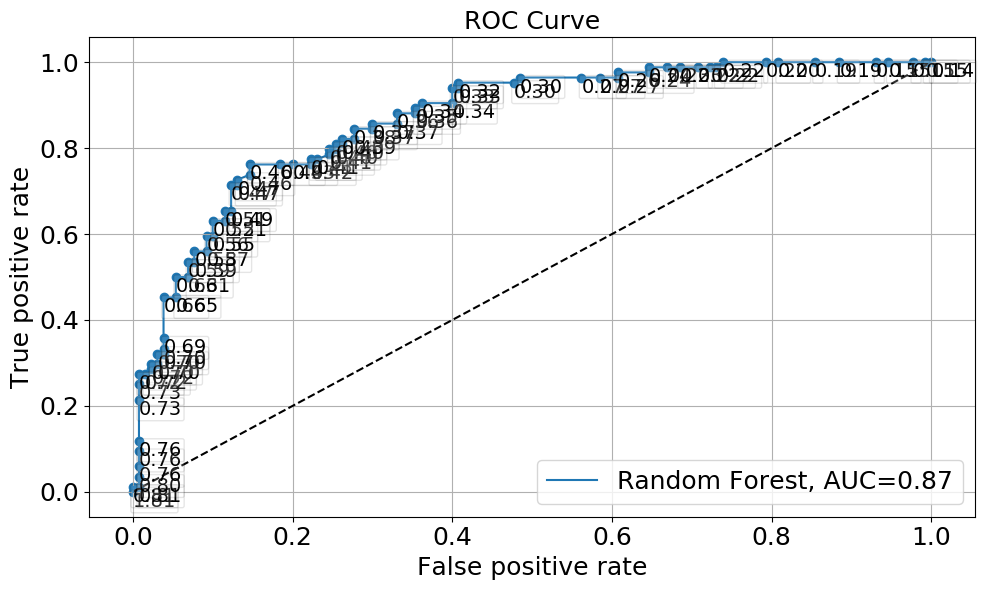

In [ ]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(rf_clf, X_test_mms, y_test, "Random Forest", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# Naive Bayes 

In [ ]:
nb = GaussianNB()
nb = nb.fit(X_training, y_training.values.ravel())
nb

nb_training_pred = nb.predict(X_training)
nb_test_pred = nb.predict(X_test_mms)

GaussianNB(priors=None, var_smoothing=1e-09)

Naive Bayes Confusion Matrix - Training

In [ ]:
confusion_matrix(y_training, nb_training_pred)

array([[384, 139],
       [ 62, 271]])

In [ ]:
print(classification_report(y_training, nb_training_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79       523
         1.0       0.66      0.81      0.73       333

    accuracy                           0.77       856
   macro avg       0.76      0.77      0.76       856
weighted avg       0.78      0.77      0.77       856



Naive Bayes Confusion - Testing

In [ ]:
confusion_matrix(y_test, nb_test_pred)

array([[ 19, 111],
       [  3,  81]])

In [ ]:
print(classification_report(y_test, nb_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.15      0.25       130
         1.0       0.42      0.96      0.59        84

    accuracy                           0.47       214
   macro avg       0.64      0.56      0.42       214
weighted avg       0.69      0.47      0.38       214



ROC Curve - Naive Bayes

#plot the ROC curve for the Naive Bayes Classifier

from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(nb, X_test, y_test, name, ax, show_thresholds=True):
    nb_test_pred = nb.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, nb_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

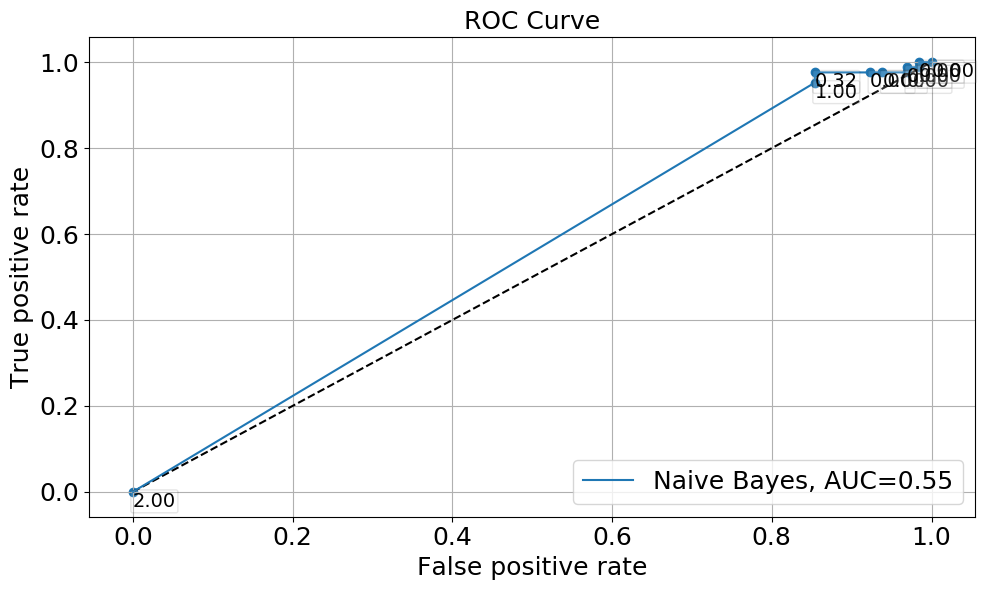

In [ ]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(nb, X_test, y_test, "Naive Bayes", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# KNN

Hyperparameter Tuning

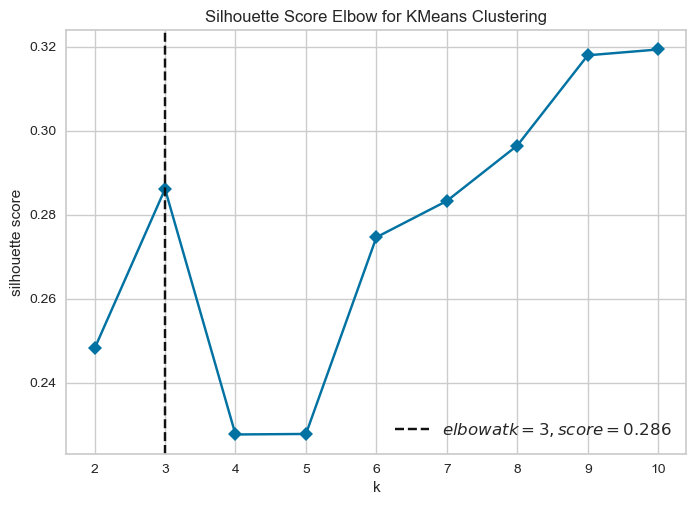

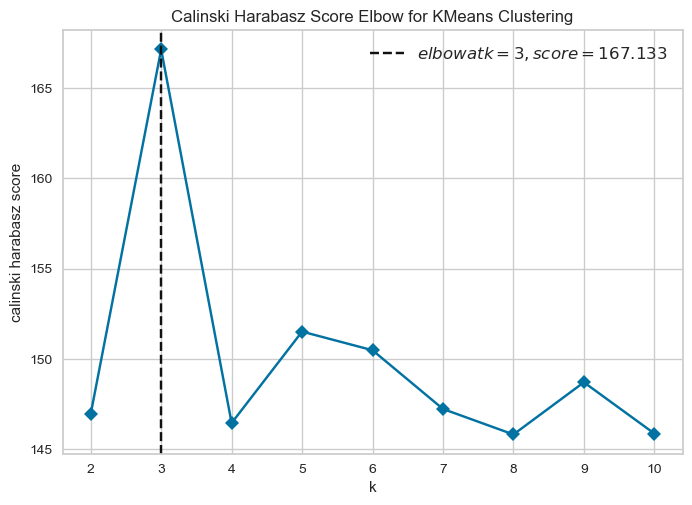

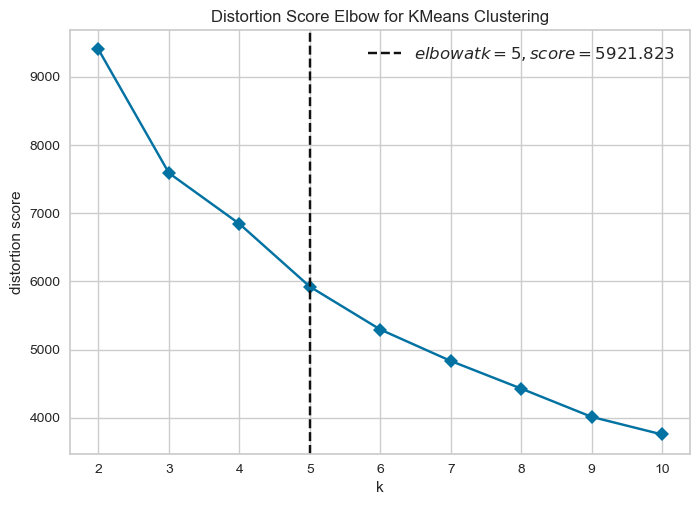

In [ ]:
#Elbow Method (Using Yellowbrick Package)

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances

from yellowbrick.utils import KneeLocator
from yellowbrick.style.palettes import LINE_COLOR
from yellowbrick.cluster.base import ClusteringScoreVisualizer
from yellowbrick.exceptions import YellowbrickValueError, YellowbrickWarning

try:
    from sklearn.metrics import calinski_harabasz_score as chs
except ImportError:
    from sklearn.metrics import calinski_harabaz_score as chs

model = KMeans(init='k-means++', n_init=10, max_iter=1000, random_state=42)
KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False).fit(X_train_ss).poof();
KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz', timings=False).fit(X_train_ss).poof();
KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False).fit(X_train_ss).poof();

In [ ]:
k_knn = 5

model_knn =  KNeighborsClassifier(n_neighbors=k_knn)
model_knn.fit(X_training, y_training.values.ravel())

knn_training_pred = model_knn.predict(X_training)
knn_test_pred = model_knn.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNN Confusion Matrix - Training

In [ ]:
confusion_matrix(y_training, knn_training_pred)

array([[461,  62],
       [ 96, 237]])

In [ ]:
print(classification_report(y_training, knn_training_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       523
         1.0       0.79      0.71      0.75       333

    accuracy                           0.82       856
   macro avg       0.81      0.80      0.80       856
weighted avg       0.81      0.82      0.81       856



KNN Confusion Matrix - Testing

In [ ]:
confusion_matrix(y_test, knn_test_pred)

array([[103,  27],
       [ 33,  51]])

In [ ]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.77       130
         1.0       0.65      0.61      0.63        84

    accuracy                           0.72       214
   macro avg       0.71      0.70      0.70       214
weighted avg       0.72      0.72      0.72       214



ROC Curve - KNN

In [ ]:
#plot the ROC curve for the KNN

from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(model_knn, X_test, y_test, name, ax, show_thresholds=True):
    nb_test_pred = model_knn.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, knn_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

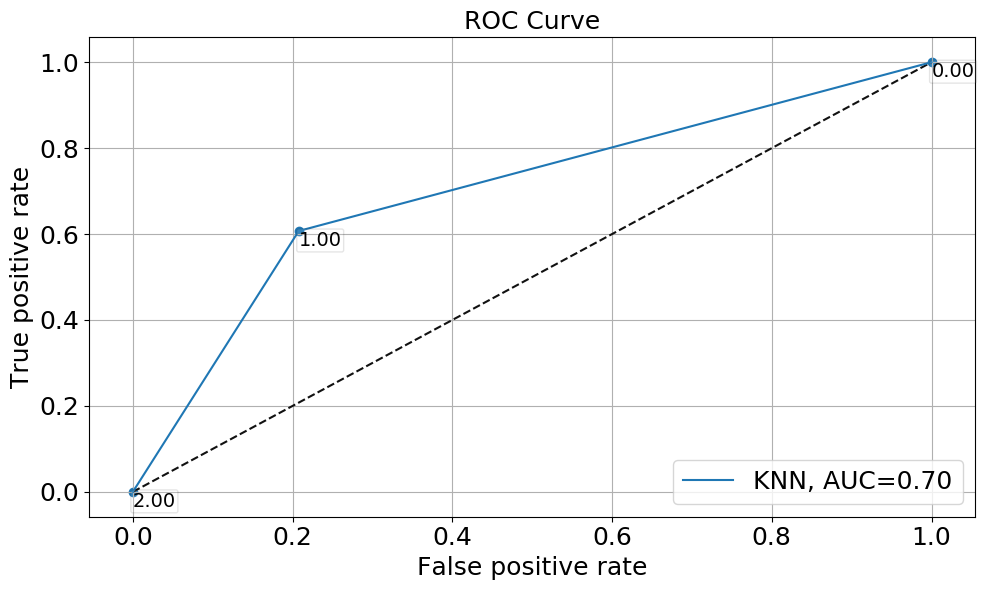

In [ ]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(model_knn, X_test_mms, y_test, "KNN", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# SVM

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparam_dist= {'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma' : [0.001, 0.01, 0.1, 1],
                  'kernel': ['rbf','linear']};

SVC_clf = SVC(random_state=42)

randomsearch = RandomizedSearchCV(SVC_clf, param_distributions = hyperparam_dist, 
                                  cv=5, return_train_score=True, verbose=3)

randomsearch.fit(X_training, y_training);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=rbf, gamma=0.1, C=0.001 ..................................
[CV]  kernel=rbf, gamma=0.1, C=0.001, score=(train=0.611, test=0.610), total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=0.001 ..................................
[CV]  kernel=rbf, gamma=0.1, C=0.001, score=(train=0.611, test=0.610), total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=0.001 ..................................
[CV]  kernel=rbf, gamma=0.1, C=0.001, score=(train=0.611, test=0.610), total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=0.001 ..................................
[CV]  kernel=rbf, gamma=0.1, C=0.001, score=(train=0.611, test=0.612), total=   0.0s
[CV] kernel=rbf, gamma=0.1, C=0.001 ..................................
[CV]  kernel=rbf, gamma=0.1, C=0.001, score=(train=0.611, test=0.612), total=   0.0s
[CV] kernel=linear, gamma=0.01, C=0.01 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  kernel=linear, gamma=0.01, C=0.01, score=(train=0.735, test=0.744), total=   0.0s
[CV] kernel=linear, gamma=0.01, C=0.01 ...............................
[CV]  kernel=linear, gamma=0.01, C=0.01, score=(train=0.765, test=0.750), total=   0.0s
[CV] kernel=linear, gamma=0.01, C=0.01 ...............................
[CV]  kernel=linear, gamma=0.01, C=0.01, score=(train=0.750, test=0.744), total=   0.0s
[CV] kernel=linear, gamma=0.01, C=0.01 ...............................
[CV]  kernel=linear, gamma=0.01, C=0.01, score=(train=0.773, test=0.771), total=   0.0s
[CV] kernel=linear, gamma=0.01, C=0.01 ...............................
[CV]  kernel=linear, gamma=0.01, C=0.01, score=(train=0.761, test=0.765), total=   0.0s
[CV] kernel=linear, gamma=0.1, C=10 ..................................
[CV]  kernel=linear, gamma=0.1, C=10, score=(train=0.855, test=0.808), total=   0.2s
[CV] kernel=linear, gamma=0.1, C=10 ..................................
[CV]  kernel=linear, gamma=0.1, C=10, score=(trai

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.7s finished


In [ ]:
randomsearch.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'C': 1}

In [ ]:
svm = SVC(gamma=0.1,
          kernel = 'linear',
          C = 1,
          random_state = 42,
          verbose = True,
          probability = True
         )
svm.fit(X_training, y_training.values.ravel())

svm_training_pred = svm.predict(X_training)
svm_test_pred = svm.predict(X_test)

[LibSVM]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

SVM Confusion Matrix - Training

In [ ]:
confusion_matrix(y_training, svm_training_pred)

array([[465,  58],
       [ 76, 257]])

In [ ]:
print(classification_report(y_training, svm_training_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       523
         1.0       0.82      0.77      0.79       333

    accuracy                           0.84       856
   macro avg       0.84      0.83      0.83       856
weighted avg       0.84      0.84      0.84       856



SVM Confusion Matrix - Testing

In [ ]:
confusion_matrix(y_test, svm_test_pred)

array([[114,  16],
       [ 26,  58]])

In [ ]:
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       130
         1.0       0.78      0.69      0.73        84

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214



ROC Curve - SVM

In [ ]:
#plot the ROC curve for the SVM

from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc,confusion_matrix

def plot_roc(svm_model, X_test, y_test, name, ax, show_thresholds=True):
    svm_test_pred = svm_model.predict_proba(X_test_mms)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, svm_test_pred)
    
    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);
    
    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));

    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

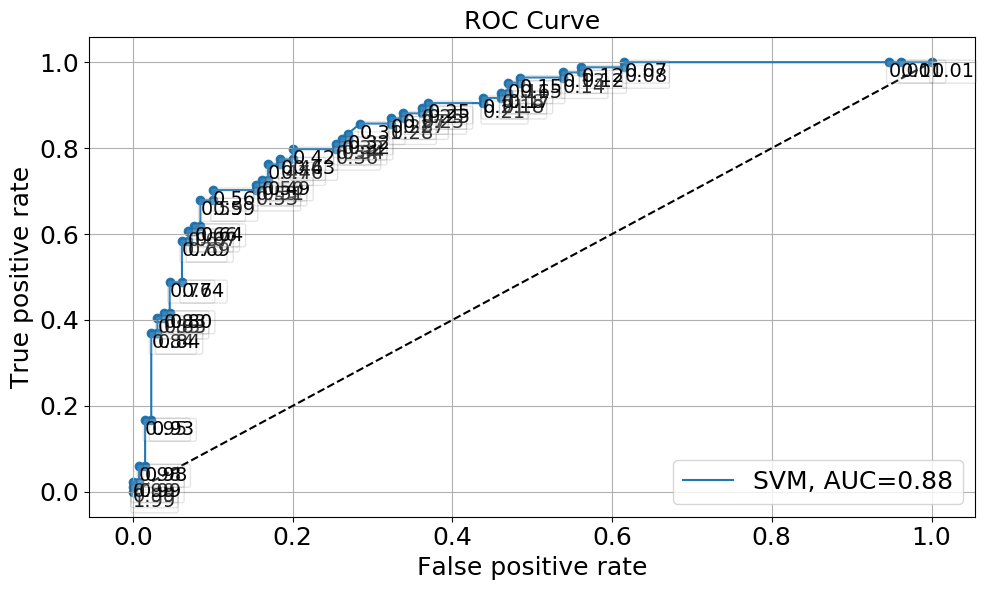

In [ ]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(svm, X_test_mms, y_test, "SVM", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# Neural Network

In [ ]:
y_training.shape[1]
y_training.shape
X_training.shape[1]
X_training.shape

1

(856, 1)

19

(856, 19)

In [ ]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

trainX = X_train_s
trainy = y_train
testX = X_val_s
testy = y_val

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=trainX.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200)#, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 642 samples, validate on 214 samples
Epoch 1/200
642/642 [==============================] - 0s 338us/step - loss: 0.5923 - accuracy: 0.6869 - val_loss: 0.5271 - val_accuracy: 0.7617
Epoch 2/200
642/642 [==============================] - 0s 116us/step - loss: 0.4558 - accuracy: 0.7944 - val_loss: 0.4911 - val_accuracy: 0.8084
Epoch 3/200
642/642 [==============================] - 0s 82us/step - loss: 0.4065 - accuracy: 0.8411 - val_loss: 0.4658 - val_accuracy: 0.8037
Epoch 4/200
642/642 [==============================] - 0s 85us/step - loss: 0.3832 - accuracy: 0.8396 - val_loss: 0.4488 - val_accuracy: 0.7944
Epoch 5/200
642/642 [==============================] - 0s 79us/step - loss: 0.3760 - accuracy: 0.8427 - val_loss: 0.4415 - val_accuracy: 0.7944
Epoch 6/200
642/642 [==============================] - 0s 81us/step - loss: 0.3658 - accuracy: 0.8427 - val_loss

Text(0.5, 1.0, 'Loss')

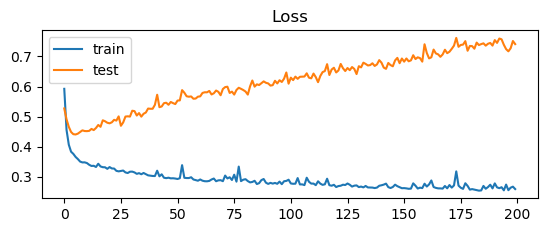

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

Text(0.5, 1.0, 'Accuracy')

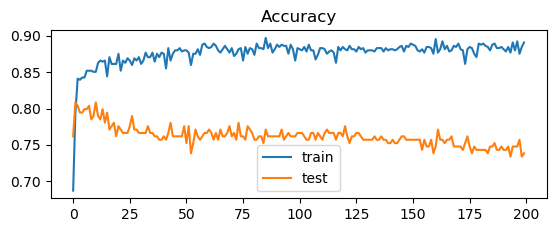

In [ ]:
#plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
nn_training_pred = model.predict_classes(trainX)
nn_test_pred = model.predict_classes(testX)


In [ ]:
print(classification_report(y_train, nn_training_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       396
         1.0       0.88      0.85      0.86       246

    accuracy                           0.90       642
   macro avg       0.89      0.89      0.89       642
weighted avg       0.90      0.90      0.90       642



In [ ]:
print(classification_report(y_val, nn_test_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       127
         1.0       0.68      0.68      0.68        87

    accuracy                           0.74       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.74      0.74      0.74       214

